<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_6_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Simple linear regression (OLS - Ordinary Least Squares)



As a conversation starter here is Twitter science fact:

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/leg.png)

It turns out OLS has been around for a while.

Consider you have training data $\{(x_1,y_1),\cdots,(x_n,y_n)\}$ and you want find a line 

$$
y(x)=a+b\cdot x
$$

that fits your data the best. To determine the best parameters $a$ and $b$ we use a measure of discrepancy between  the observed outputs and the linear regression fit such as the **S**um of **S**quared training **E**rrors. This is also called ordinary least squares and minimizes

$$
SSE(a,b)=SSE(fit)=\sum_{i=1}^n{\text{residual}_i}^2=\sum_{i=1}^n(y_i-y(x_i))^2=\sum_{i=1}^n(y_i-a-b\cdot x_i)^2.
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/lines.png)

Our task is to find the parameters $\hat{a}$ and $\hat{b}$ that minimize $SSE(a, b)$. 
This function is sometimes called error function or fit function or loss function.

We are seeking for

$$
(\hat{a},\hat{b})=\text{argmin}_{a,b} \, SSE(a,b).
$$

You could choose

$$
E_p(a,b)=\sum_{i=1}^n |y_i-y(x_i)|^p , \qquad 1\leq p < \infty.
$$

In fact we can choose distances in a completely different ways 

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/dist.png)

These $E$s would render different results. We've chosen quadratic function $p=2$ (hence least-squars method name) because we can find its minimum analytically.

Later we will find it useful to add extra term to $SSE(a,b)$ (regularization). 




 




In [21]:
#@title #Sum of squared errors (SSE)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib.gridspec as gridspec
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression

old_size = -1
X = np.linspace(-5.0, 5.0, num=1)
sig = 5.0
rnd = scipy.stats.norm.rvs(0.0, sig, size=1)
@widgets.interact(b=(-5.0, 5.0), a=(-5.0,5.0), p=(1.0,4.0), sample_size=(1,300))
def plot_regr(b, a, p, sample_size):
  k_real = 1.0
  b_real = 0.0
  global X, rnd, old_size
  if old_size != sample_size:
    X = np.linspace(-5.0, 5.0, num=sample_size)
    rnd = scipy.stats.norm.rvs(0.0, sig, size=sample_size)
    old_size = sample_size
  Y = X * k_real + b_real + rnd


  plt.close('all')
  fig = plt.figure(figsize=(12,6))
  gridspec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1, 1], height_ratios=[1])

  subplotspec_line = gridspec.new_subplotspec((0, 0))
  subplotspec_contour = gridspec.new_subplotspec((0, 1))

  ax_line = plt.subplot(subplotspec_line)
  ax_contour = plt.subplot(subplotspec_contour)

  ax_line.title.set_text('')
  ax_contour.title.set_text('SSE function')

  model = LinearRegression(fit_intercept=True)
  model.fit(X[:, np.newaxis], Y)
  xfit = np.linspace(-5, 5, 1000)
  yfit = model.predict(xfit[:, np.newaxis])
  
  ax_line.scatter(X, Y)
  ax_line.plot(xfit, yfit, linestyle='--', color='green', label="regression line");
  ax_line.set_ylim(np.min(Y), np.max(Y))
  
  Y_ = X * b + a
  ax_line.plot(X, Y_, linestyle='-', color='red', label="test line");
  ax_line.legend()

  b_pred = model.coef_
  a_pred = model.intercept_

  a_b = np.linspace(-5.0, 5.0, 50)
  a_a = np.linspace(-5.0, 5.0, 50)
  K, B = np.meshgrid(a_b, a_a)
  D = np.sum(np.power(np.abs(K * X[:, np.newaxis, np.newaxis] + B - Y[:, np.newaxis, np.newaxis]), p), axis=0)
  ax_contour.contourf(K, B, D, levels=50)
  ax_contour.plot(b, a, 'ro')
  ax_contour.scatter([b_pred], [a_pred], c='green')
  ax_contour.set_xlabel('b')
  ax_contour.set_ylabel('a')

interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

Actially we can calculate minimum analytically.
Differentiating with respect to $a$ and $b$ we obtain

$$
\begin{aligned}
\frac{\partial}{\partial a}SSE(a,b)&=-2\sum_{i=1}^n(y_i-a-bx_i), \\
\frac{\partial}{\partial b}SSE(a,b)&=-2\sum_{i=1}^n(y_i-a-bx_i)x_i. \\
\end{aligned}
$$

Dividing by $N$ and equating equations to zero, we can deduce the optimal parameters as a solution of two two linear equations

$$
\begin{aligned}
&\langle{y}\rangle-\hat{a}-\hat{b}\langle{x}\rangle=0, \\
&\langle{xy}\rangle-\hat{a}\langle{x}\rangle-\hat{b}\langle{x^2}\rangle=0.
\end{aligned}
$$

Solving this we obtain

$$
\begin{aligned}
\hat{a}&=\langle{y}\rangle-\hat{b}\langle{x}\rangle, \\
\hat{b}&=\frac{\langle{xy}\rangle-\langle{x}\rangle\langle{y}\rangle}{\langle{x^2}\rangle-\langle{x}\rangle^2}.
\end{aligned}
$$

Expression for $b$ could be rewritten as

$$
\hat{b}=\frac{\sigma(x,y)}{\sigma_x^2}
$$

Where $\sigma_x$ is uncorrected(biased) sample standard deviation and $\sigma(x,y)$ is covariation.


It's easy to show that regression line always passes through the center of mass of the point cloud - the point $(\langle x \rangle, \langle y \rangle)$ (aka point of averages, aka centroid).

Let me remind you that
$$
\rho(x,y)=\frac{\sigma(x,y)}{\sigma_x \sigma_y}.
$$

so

$$
\hat{b}=\rho(x,y)\frac{\sigma_y}{\sigma_x},
$$

where $\rho(x,y)$ is correlation coefficient (a.k.a. **Pearson correlation coefficient**).

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/sd.png)

Actually we can write equation of the line as

$$
y=\langle {y} \rangle+\rho(x,y)\frac{\sigma_y}{\sigma_x}(x-\langle {x} \rangle)
$$

or in standard form

$$
\frac{y-\langle {y} \rangle}{\sigma_y}=\rho(x,y)\frac{x-\langle {x} \rangle}{\sigma_x}
$$

This equation shows why regression is actually called this way. In units of std $y$ deviates from its average $\rho(x,y)$ less then $x$. It's called regression towards mean. The concept of regression comes from genetics and was popularized by Sir Francis Galton during the late 19-th century with the publication of [Regression towards mediocrity in hereditary stature](http://www.stat.ucla.edu/~nchristo/statistics100C/history_regression.pdf). Galton observed that extreme characteristics (e.g., height) in parents are not passed on completely to their offspring. Rather, the characteristics in the offspring regress towards a mean. 

In fact equations above show the power of descriptive statistics:
equation 

$$
y=\langle {y} \rangle+\rho(x,y)\frac{\sigma_y}{\sigma_x}(x-\langle {x} \rangle)
$$

looks much more clean and meaningful than

$$
y=\hat{a}+\hat{b}\, x, 
$$

with 

$$
\begin{aligned}
\hat{a}&=\frac{\sum_i y_i}{N}-\hat{b}\frac{\sum_i x_i}{N}, \\
\hat{b}&=\frac{\frac{\sum_i x_i y_i}{N}-\frac{\sum_i x_i\sum_i y_i}{N^2}}{\frac{\sum_i x_i^2}{N}-\left(\frac{\sum_i x_i^2}{N}\right)^2}.
\end{aligned}
$$

We can not only calculate fitting line but also get the goodeness of fit with the help of the **coefficient of determination**.
The coefficient of determination ("$R$ squared") is equal to $\rho^2$. 
This is a statistical measure of how well the regression prediction approximates real data points. An $R^2$ of $1$ indicates that the regression predictions perfectly fit the data.

##Coefficient of determination

Now when we have expressions for $\hat{a}$ and $\hat{b}$ let's explore square of the loss function.

$$
SSE(fit)=\sum(y_i-\hat{a}-\hat{b}x_i)^2=\{\hat{a}=\langle y \rangle - \hat{b} \langle x \rangle \} =\\
=\sum(y_i-\langle y \rangle -\hat{b} \langle x \rangle-\hat{b}x_i)^2=\sum \left((y_i-\langle y \rangle) -\hat{b} (x_i-\langle x \rangle)\right)^2 = \\
=\sum (y_i-\langle y \rangle)^2-2 \hat{b} \sum (y_i-\langle y \rangle)(x_i-\langle x \rangle)+{\hat{b}}^2\sum (x_i-\langle x \rangle)^2
$$

We now use definitions

$$
\begin{aligned}
\sigma^2_y&=\frac{\sum (y_i-\langle y \rangle)^2}{n} \\
\sigma^2_x&=\frac{\sum (x_i-\langle x \rangle)^2}{n} \\
\sigma_{xy}&=\frac{\sum (x_i-\langle x \rangle)(y_i-\langle y \rangle)}{n} 
\end{aligned}
$$

We get

$$
SSE(fit)= n \sigma^2_y-2\hat{b} n\sigma_{xy}+{\hat{b}}^2 n\sigma_x^2
$$

Now we use that

$$
\hat{b}=\frac{\sigma_{xy}}{\sigma_x^2}
$$

We obtain

$$
SSE(fit)= n \sigma^2_y-2n\frac{\sigma^2_{xy}}{\sigma_x^2}+ n\frac{\sigma^2_{xy}}{\sigma_x^2}=n \sigma^2_y-n\frac{\sigma^2_{xy}}{\sigma_x^2}
$$

We now divide both sides by $n\sigma_y^2$ that could be called $SSE(data)$ as

$$
SSE(data)=n\sigma_y^2=\sum(y_i-\langle y \rangle)^2
$$

We get

$$
\frac{SSE(fit)}{SSE(data)}=1-\frac{\sigma^2_{xy}}{\sigma_x^2 \sigma_y^2}
$$

Finally we use definition of $R^2=\frac{\sigma^2_{xy}}{\sigma_x^2 \sigma_y^2}$ to get

$$
R^2=1-\frac{SSE(fit)}{SSE(data)}=\frac{SSE(data)-SSE(fit)}{SS(data)}
$$

If we recall that $Var(data)=\frac{SSE(data)}{n}$ we can express $R^2$ as

$$
R^2=\frac{Var(data)-Var(fit)}{Var(data)}
$$

That what we were aiming at. 


**$R^2$ shows what fraction of initial data variance is explaned by the fitted model.**

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/R2.png)

Quantity $FVU=1-R^2$ is called **F**raction of **V**ariance **U**nexplained.

##Get-your-hands-dirty example

Let's do simple example by hand to get a feel of the method.
Suppose you have data $\{(1,1),(2,4),(4,5)\}$.
First we calculate averages and std's.

$$
\begin{aligned}
\langle{x}\rangle &=\langle{\{1,2,4\}}\rangle=\frac{1+2+4}{3}=2.33, \\
\langle{y}\rangle &=\langle{\{1,4,5\}}\rangle=\frac{1+4+5}{3}=3.33, \\
\sigma_x&=\sqrt{\frac{(1-2.33)^2+(2-2.33)^2+(4-2.33)^2}{3}}=1.25, \\
\sigma_y&=\sqrt{\frac{(1-3.33)^2+(4-3.33)^2+(5-3.33)^2}{3}}=1.70.
\end{aligned}
$$

Next we calculate covariation and correlation:

$$
\begin{aligned}
\sigma(x,y)&={\frac{(1-2.33)(1-3.33)+(2-2.33)(4-3.33)+(4-2.33)(5-3.33)}{3}}=1.89, \\
\rho(x,y)&=\frac{\sigma(x,y)}{\sigma_x \, \sigma_y}=\frac{1.89}{1.25\times 1.70}=0.89.
\end{aligned}
$$

Now we are ready to get parameters of the regression line
$$
\begin{aligned}
\hat{b}&=\rho(x,y)\frac{\sigma_y}{\sigma_x}=1.37\times\frac{1.70}{1.25}=1.21, \\
\hat{a}&=\langle{y}\rangle - \hat{b} \langle{x}\rangle=3.33-1.21\times 2.33=0.51.
\end{aligned}
$$


Thus the regression line is

$$
y=0.5+1.2 \, x.
$$

Goodeness of fit is

$$
R^2=\rho^2(x,y)=0.89^2=0.8.
$$

that means that $80\%$ of variance is explained by the linear model.

Here is how you can do it in `Python`:

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
xlist = [1,2,4]
ylist = [1,4,5]
x = np.array(xlist).reshape(-1,1)
y = np.array(ylist).reshape(-1,1)
model.fit(x,y)
print("Model slope b              = ", model.coef_[0][0])
print("Model intercept a          = ", model.intercept_[0])
print("Coef. of determination R^2 = ", (np.corrcoef(xlist, ylist)[0][1])**2)

Model slope b              =  1.2142857142857144
Model intercept a          =  0.49999999999999956
Coef. of determination R^2 =  0.7939560439560437


##Simple Linear Regression Example

Here are $50$ points that fit a line $2x-5$ with somewhat randomeness added.

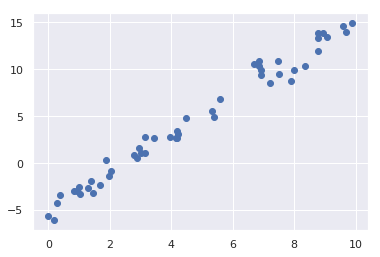

In [0]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

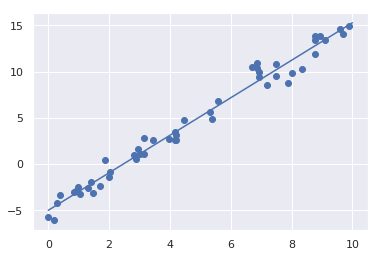

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [0]:
print("Model slope     = ", model.coef_[0])
print("Model intercept = ", model.intercept_)
print("R**2            = ", model.score(x.reshape(-1, 1),y))

Model slope     =  2.0272088103606953
Model intercept =  -4.998577085553204
R**2            =  0.9790800609430612


We successfully obtained parameters of the line. The $R^2=0.97$ tells us that the fit is pretty good.

## Interactive simple linear example

Feel free to play around with points on a plane.

In [0]:
from sklearn.linear_model import LinearRegression

def fit_model(X, Y):
  model = LinearRegression(fit_intercept=True)
  model.fit(X, Y)
  return model

In [23]:
#@title Visualization code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-30)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 10)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / 300.0 - 1.0
  X[:, 1] *= -1.0
  model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(model, X))

  return IPython.display.JSON({'image': img})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["Point"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        for (var i = 0; i < class_name.length; i++) {
          ctx.font = '20px serif';
          ctx.fillStyle = 'black';
          ctx.fillText(class_name[i], 675,  55 + 100*i);
          circ(ctx, class_btn[i], i);
          ctx.strokeRect(625, 25 + 100*i, 150, 50);
        }

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }
    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      for (var i = 0; i < class_name.length; i++) { 
        if (is_close([x,y], class_btn[i])) { 
          active_pt = [x, y, i]
        }
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx > -1) {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
    }
    
    function mmove_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:150px; left:625px;">
    <button type="button" onclick="calculate();">
      Do linear regression
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
output.register_callback('notebook.InvSVM', invoke)

#Polylinear regression

Here is an example of polylinear regression.

Find the hyperline

$$
y(x_1, \cdots, x_n)=a \cdot 1 + b_1x_1+b_2x_2+\cdots+b_nx_n \\
y(\mathbf{x})=a\cdot 1+\mathbf{b}^{\top} \mathbf{x}=(a, \mathbf{b})(1,\mathbf{{x}})^{\top}
$$

that fits sample $\{(\mathbf{x}^{(i)};y_{i})\}$.

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print("Intersept = ", model.intercept_)
print("Slope b = ", model.coef_)

Intersept =  0.50000000000001
Slope =  [ 1.5 -2.   1. ]


We have best fit line (hyperlane)

$$
y(x_1,x_2,x_3)=0.5+1.5\, x_1-2.0\, x_2+1.0\, x_3.
$$

##Methods to solve polylinear regression

###Matrix method

First we switch from variables $b_i \, (i=1\dots n)$ and $a$ to $w_i \, (i=0\dots n)$

$$
\begin{aligned}
w_{0}&=a \\
w_{i}&=b_i, \qquad \qquad \qquad \qquad \,\,\,\, i=1\dots n.
\end{aligned}
$$

Suppose you have data arranged in vectors

$$
\begin{aligned}
&\mathbf{x}^{(i)}=(1, x^{(i)}_{1},\cdots,x^{(i)}_{n})^{\top}, \qquad i=1\dots N. \\
&\mathbf{y}=(y_{1},\cdots,y_{N})^{\top}.
\end{aligned}
$$

We are seeking for the vector of $\hat{\mathbf{w}}$ so that

$$
\mathbf{y}_i \approx \hat{\mathbf{w}}^{\top}\mathbf{x}^{(i)}, \qquad \qquad \qquad \qquad i=1\dots N.
$$

We can express this equation in a single matrix equation. For that we place $\mathbf{x}^{(i)}$ in the rows of the matrix

$$
X=
\begin{pmatrix}
- & \mathbf{x}^{(1)\top} & - \\
\cdots & \cdots & \cdots\\
- & \mathbf{x}^{(N)\top} & - 
\end{pmatrix}
=
\begin{pmatrix}
1 & x^{(1)}_{1} & \cdots & x^{(1)}_{n} \\
\cdots & \cdots & \cdots & \cdots\\
1 & x^{(N)}_{1} & \cdots & x^{(N)}_{n} 
\end{pmatrix}.
$$

Now we can say that we are aiming to solve this

$$
X \mathbf{w} \approx \mathbf{y}.
$$

What does the $\approx$ sign mean? We want to minimize the norm squared of the residual function

$$
\mathbf{\epsilon}(\mathbf{w})=\mathbf{y}-X \mathbf{w}.
$$

In other words we our objective function reads

$$
E(\mathbf{w})={\|{\mathbf{\epsilon}}(\mathbf{w})\|}^2={\|\mathbf{y}-X \mathbf{w}\|}^2.
$$

We would like to find

$$
\hat{\mathbf{w}}=\text{argmin}_\mathbf{w} \, {\|\mathbf{y}-X \mathbf{w}\|}^2
=
\text{argmin}_\mathbf{w} \, (\mathbf{y}-X \mathbf{w})^{\top}(\mathbf{y}-X \mathbf{w})
=
\text{argmin}_\mathbf{w} \,(\mathbf{y}^{\top}\mathbf{y}-2\mathbf{w}^{\top}X^{\top}\mathbf{y}+\mathbf{w}^{\top}X^{\top}X\mathbf{w}).
$$

Please refer to [Matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) if you don't know how to take derivative of the linear and quadratic forms with respect to a vector

$$
\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}}=-2 X^{\top}\mathbf{y}+2 X^{\top}X\mathbf{w}=\mathbf{0}.
$$

Equating derivative to $\mathbf{0}$ we get following equations (that are called Normal equations):

$$
X^{\top}X \, \hat{\mathbf{w}}=X^{\top}\mathbf{y},
$$

that have following solution (more on it's geometric meaning later)

$$
\hat{\mathbf{w}} = (X^{\top}X)^{-1}X^{\top}\mathbf{y}=X^{+}\mathbf{y},
$$

where $X^{+}$ is the Pseudoinverse matrix of $X$ defined as

$$
X^{+}=(X^{\top}X)^{-1}X^{\top}.
$$

In practice working with lots of data points inverting $X^{\top}X$ is not possible.


###Example


Let we have points 
$$
\begin{aligned}
\mathbf{x}^{(1)}&=(1,1)^{\top}, \\
\mathbf{x}^{(2)}&=(1,2)^{\top}, \\
\mathbf{x}^{(3)}&=(1,4)^{\top} \\
\end{aligned}
$$

and $\mathbf{y}=(1,4,5)^{\top}$.

$$
X=
\begin{pmatrix}
- & \mathbf{x}^{(1)\top} & - \\
- & \mathbf{x}^{(2)\top} & - \\
- & \mathbf{x}^{(3)\top} & - 
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 4 
\end{pmatrix}.
$$

Now let's calculate pseudoinverse matrix

$$
X^{+}=\left(\begin{pmatrix}
1 & 1 & 1 \\
1 & 2 & 4 
\end{pmatrix}
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 4 
\end{pmatrix}
\right)^{-1}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 2 & 4 
\end{pmatrix}=
\begin{pmatrix}
1 & 1/2 & -1/2 \\
-2/7 & -1/14 & 5/14 
\end{pmatrix}.
$$

$$
\hat{\mathbf{w}}=X^{+}\mathbf{y}=
\begin{pmatrix}
1 & 1/2 & -1/2 \\
-2/7 & -1/14 & 5/14 
\end{pmatrix}
\begin{pmatrix}
1 \\
4 \\ 
5
\end{pmatrix}=
\begin{pmatrix}
0.5 \\
1.21  
\end{pmatrix}.
$$

This solution matches the one we found [earlier](https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_6_linear_regression.ipynb#scrollTo=zwU3EXe3DZEz) using statistical functions $\sigma_x$, $\sigma_y$, $\langle x \rangle$, $\langle y \rangle$ and $\rho(x,y)$.

###Linear algebra perspective on the matrix method

I'd like to remind you a few things from linear algebra.
Suppose you have equation

$$
X\mathbf{w}=\mathbf{y}
$$

What does it mean?
It means: if $\mathbf{y}$ belongs to the column space of $X$ (aka $\text{Image}(X)$ or $\text{Im}$(X)) 

$$
\mathcal{C}(X)=\mathcal{C}
\left(\begin{pmatrix}
| & | \\
\mathbf{x}_1 & \mathbf{x}_2 \\
| & | 
\end{pmatrix}\right)
$$

find it's decomposition into $\mathbf{x}_1$ and $\mathbf{x}_2$

$$
\mathbf{y}=w_1 \mathbf{x}_1 + w_2 \mathbf{x}_2
$$

Note, that if $\mathbf{y} \, {\not\in} \, \mathcal{C}(X)$ we can't solve for $(w_1, w_2)$.
The best we can do is to project orthogonally $\mathbf{y}$ into $\mathcal{C}(X)$ and then solve the equation.
Let me remind you that

$$
\mathcal{C}(X)=\{\mathbf{x}|\mathbf{x}=X\mathbf{w} \}
$$

This is done with the following *projection operator*

$$
\text{Proj}_X=X(X^{\top}X)^{-1}X^{\top}
$$


$\text{Proj}_X$ performs orthogonal projection into space $\mathcal{C}(X)$.
It turns out that orthgonal complement to $\mathcal{C}(X)$ is $\text{ker}(X^{\top})$

$$
\text{ker}(X^{\top})=\{\mathbf{x}|X^{\top}\mathbf{x}=\mathbf{0}\}
$$

It means that every vector can be decomposed into two perpendicular vectors one of each is in $\mathcal{C}(X)$ and the other in $\text{ker}(X^{\top})$.

Let's prove that $\text{Proj}_X$ indeed projects vectors into $\mathcal{C}(X)$.

Suppose $\mathbf{x} \in \mathcal{C}(X)$

$$
\text{Proj}_X \mathbf{x}=X(X^{\top}X)^{-1}X^{\top} X\mathbf{w}=X(X^{\top}X)^{-1}(X^{\top}X)\mathbf{w}=X\mathbf{w}=\mathbf{x}
$$

Suppose $\mathbf{x} \in \text{ker}(X)$

$$
\text{Proj}_X \mathbf{x}=X(X^{\top}X)^{-1}X^{\top} \mathbf{x}=X(X^{\top}X)^{-1}\mathbf{0}=\mathbf{0}
$$

This shows that $\text{Proj}_X$ indeed works like a projection operator into $\mathcal{C}(X)$
* doesn't change vectors in $\mathcal{C}(X)$;
* nullifies vectors that are perpendicular to $\mathcal{C}(X)$ (belongs to $\text{ker}(X)$).

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/kerr.png)

Now we can solve equation

$$
\begin{aligned}
X\mathbf{w}&={\mathbf{y}_{\text{proj}}}, \\
X\mathbf{w}&=\text{Proj}_X \mathbf{y}, \\
X\mathbf{w}&=X(X^{\top}X)^{-1}X^{\top} \mathbf{y}. 
\end{aligned}
$$

The solution is given by

$$
\begin{aligned}
\mathbf{w}&=(X^{\top}X)^{-1}X^{\top} \mathbf{y}  \\
\mathbf{w}&=X^{+} \mathbf{y}  \\
\end{aligned}
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/proj.png)

Geometrically it means that we find vector in the hyperplane $\mathcal{C}(X)$ that is closest
to our initial vector $\mathbf{y}$ i.e. we minimize $\mathbf{y}-\mathbf{y}^*$ where  $\mathbf{y}^* \in \mathcal{C}(X)$. Common sense suggests that $\mathbf{y}-\mathbf{y}^*$ should be $\mathbf{y}_\perp$ and $\mathbf{y}^*$ should be orthogonal projection into the hyperplane.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/proj_2.png)

###Gradient descent method

Suppose we want to minimize some function $E(\mathbf{w})$ numerically. One of the methods is called gradient decent method.

We start with random starting point $\mathbf{w}_0$, set step $\Delta$ and keep moving in the direction opposite to the gradient of the objective function evaluated at the current position point.

$$
\mathbf{w}^{(j)}=\mathbf{w}^{(j-1)}-\Delta \cdot \frac{\partial E(\mathbf{w})}{\partial \mathbf{w}}\bigg\rvert_{\mathbf{w}=\mathbf{w}^{(j-1)}}.
$$

If $E(\mathbf{w})$  decreases by less than say $\epsilon=10^{-3}$ in one iteration - we declare convergence and stop iteration.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/descent.png)

For example let $E(\mathbf{w})$ be the simplest function with a global minimum - quadratic form

$$
\def\id{{\Large\unicode{x1D7D9}}}
E(\mathbf{w})=\mathbf{w}^{\top}{\id}\, \mathbf{w}=w_0^2+w_1^2.
$$

Now let's calculate the gradient of $E(\mathbf{w})$

$$
\partial_i \, E(\mathbf{w}) = \frac{\partial E(\mathbf{w})}{\partial w_i}=2w_i.
$$

Iteration is as follows

$$
w_i^{(j)}=w_i^{(j-1)}-\Delta^{'} \cdot w_i^{(j-1)}
$$

or

$$
\mathbf{w}^{(j)}=(1-\Delta^{'}) \cdot \mathbf{w}^{(j-1)},
$$

where $\Delta^{'} = 2\Delta$. In this example we see that $\Delta^{'} < 1$ we obtain geometric progression

$$
\mathbf{w}_0 \rightarrow \delta \mathbf{w}_0 \rightarrow \delta^2 \mathbf{w}_0 \rightarrow \dots \rightarrow \mathbf{0},
$$

where $\delta=1-\Delta^{'}$.

Thus $\mathbf{0}$ is our $\text{argmin}_{\mathbf{w}} \, E(\mathbf{w})$.

By the way equation

$$
\mathbf{w}^{(j)}=(1-\Delta^{'}) \cdot \mathbf{w}^{(j-1)}
$$

is the descrete version of differential equation

$$
\frac{d\mathbf{w}}{dt}=-\Delta^{'}\mathbf{w}
$$

that has solution

$$
\mathbf{w}(t)=\mathbf{w}_0 \, e^{-\Delta^{'}t}
$$

and $\mathbf{w}(t) \rightarrow \mathbf{0}$ when $t \rightarrow \infty$ and $\Delta^{'}>0$.



In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from sympy import *

x, y = symbols('x y')
expr = x**2+y**2
Gx = diff(expr, x)
Gy = diff(expr, y)
#print(diff(expr, x), diff(expr, y))

_x = np.linspace(-3.0, 3.0, num=20)
_y = np.linspace(-3.0, 3.0, num=20)
_z = np.array([[expr.evalf(subs={x: X, y: Y}) for X in _x] for Y in _y], dtype=float)

MaxIter = 5
delta = 0.7
x_ = [2.0] # initials
y_ = [2.0]
z_ = [expr.evalf(subs={x: x_[-1], y: y_[-1]})]
for iter in range(MaxIter):
  x_cur = x_[-1]
  y_cur = y_[-1]
  x_.append(x_cur - delta * Gx.evalf(subs={x: x_cur, y: y_cur}))
  y_.append(y_cur - delta * Gy.evalf(subs={x: x_cur, y: y_cur}))
  z_.append(expr.evalf(subs={x: x_[-1], y: y_[-1]}))

x_ = np.array(x_, dtype=float)
y_ = np.array(y_, dtype=float)
z_ = np.array(z_, dtype=float)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])

fig.add_trace(go.Scatter3d(x=x_, y=y_, z=z_, marker=dict(size=4, color='red'),
                                             line=dict(color='red', width=2)),
              row=1, col=1)

fig.add_trace(go.Surface(x=_x, y=_y, z=_z, opacity=0.9, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=_z, x=_x, y=_y, contours=dict(showlabels=True)),
              row=1, col=2)

fig.add_trace(go.Scatter(x=x_, y=y_, line=dict(color='red', width=2)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False, title_text="Subplots",
                  scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()

Suppose we calculate regression parameters by finding minimum of the sum of squares loss function

$$
E(\mathbf{w})= \frac{1}{N}\sum_{j=1}^N{\left(\mathbf{w}^{\top}\mathbf{x}^{(i)}-\mathbf{y}_i\right)^{\top}\left(\mathbf{w}^{\top}\mathbf{x}^{(i)}-\mathbf{y}_i\right)} =\frac{1}{N}\sum_{j=1}^N{\left(w_0+\sum_k{w_k x_k}-y_j\right)^2}.
$$

The gradient reads as
$$
\begin{aligned}
\frac{\partial E(\mathbf{w})}{\partial w_0} &= \frac{2}{N}\sum_{j=1}^N{\left(w_0+\sum_{k=1}^n{w_k x_k}-y_j\right)}, \\
\frac{\partial E(\mathbf{w})}{\partial w_i} &= \frac{2}{N}\sum_{j=1}^N{\left(w_0+\sum_{k=1}^n{w_k x_k}-y_j\right)\cdot x_j}, \qquad i=1\dots n. \\
\end{aligned}
$$

Note that 
* when $\Delta$ is too small - we're taking very small steps - too slow;
* when $\Delta$ is too large - we're taking too big steps and may miss the minimum;
* in general the cost function $E(\mathbf{w})$ has to be convex if we don't want to end up in a local minimum.

$$
\begin{aligned}
w^{(j)}_{0}&={w}^{(j-1)}_{0}-\frac{\Delta^{'}}{N} \cdot \sum_{j=1}^N{\left(y_j-\sum_{k=0}^n{w_k^{(j-1)} x_k}\right)}, \\
w^{(j)}_{i}&={w}^{(j-1)}_{i}-\frac{\Delta^{'}}{N} \cdot \sum_{j=1}^N{\left(y_j-\sum_{k=0}^n{w_k^{(j-1)} x_k}\right) \cdot x_j}, \qquad i=1\dots n. \\
\end{aligned}
$$



###Gradient descent for linear regression

Suppose we have points $\mathbf{x}=(1,2,4)^{\top}$ and $\mathbf{y}=(1,4,5)^{\top}$ that we discussed earlier.

$$
\begin{aligned}
\Delta&=0.1, \\
\mathbf{w}&=(0,0)^{\top}.
\end{aligned}
$$

In [0]:
w = [0,0]
Delta = 0.1
N = 3
x = [1,2,4]
y=[1,4,5]
Iterations = 50

for i in range(1, 50):
  w_0 = 0.0
  w_1 = 0.0
  for j in range(0, N):
    w_0 += (w[0]+w[1]*x[j]-y[j])
    w_1 += (w[0]+w[1]*x[j]-y[j]) * x[j]
  w_new = [w[0] - (Delta/N) * w_0, w[1] - (Delta/N) * w_1]
  w = w_new
  print(w)
  
print("\nRESULT:")
print("Slope = ", w[0])
print("Intercept = ", w[1])

[0.3333333333333333, 0.9666666666666667]
[0.4077777777777778, 1.1788888888888889]
[0.4252592592592593, 1.2251851851851852]
[0.43019012345679014, 1.2349950617283951]
[0.43233893004115226, 1.2367874897119342]
[0.4338546227709191, 1.236823829903978]
[0.43521026684956565, 1.2364810703246456]
[0.4365103237555251, 1.2360619254991616]
[0.4377781754301682, 1.235632835440126]
[0.439019362951122, 1.2352082763649985]
[0.4402354955041768, 1.2347912982209044]
[0.4414273097022148, 1.2343824405152968]
[0.44259534261175737, 1.2339816932240721]
[0.44374007993163145, 1.2335889280244783]
[0.44486198873275673, 1.2332039930899628]
[0.44596152480515644, 1.2328267338893457]
[0.4470391344171268, 1.2324569977122672]
[0.44809525484255175, 1.2320946346163506]
[0.44913031461448144, 1.2317394975883098]
[0.450144733715761, 1.231391442533114]
[0.451138923753125, 1.2310503282262566]
[0.4521132881250193, 1.2307160162588144]
[0.45306822218546067, 1.2303883709818064]
[0.4540041134044931, 1.2300672594512678]
[0.454921341

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from sympy import *

x, y = symbols('x y')
expr = ((x+y-1)**2+(x+2*y-4)**2+(x+4*y-5)**2)/3
Gx = diff(expr, x)
Gy = diff(expr, y)

_x = np.linspace(-3.0, 3.0, num=20)
_y = np.linspace(-3.0, 3.0, num=20)
_z = np.array([[expr.evalf(subs={x: X, y: Y}) for X in _x] for Y in _y], dtype=float)

MaxIter = 15
delta = 0.1
x_ = [-2.0] # initials
y_ = [2.0]
z_ = [expr.evalf(subs={x: x_[-1], y: y_[-1]})]
for iter in range(MaxIter):
  x_cur = x_[-1]
  y_cur = y_[-1]
  x_.append(x_cur - delta * Gx.evalf(subs={x: x_cur, y: y_cur}))
  y_.append(y_cur - delta * Gy.evalf(subs={x: x_cur, y: y_cur}))
  z_.append(expr.evalf(subs={x: x_[-1], y: y_[-1]}))

x_ = np.array(x_, dtype=float)
y_ = np.array(y_, dtype=float)
z_ = np.array(z_, dtype=float)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])

fig.add_trace(go.Scatter3d(x=x_, y=y_, z=z_, marker=dict(size=4, color='red'),
                                             line=dict(color='red', width=2)),
              row=1, col=1)

fig.add_trace(go.Surface(x=_x, y=_y, z=_z, opacity=0.9, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=_z, x=_x, y=_y, contours=dict(showlabels=True)),
              row=1, col=2)

fig.add_trace(go.Scatter(x=x_, y=y_, line=dict(color='red', width=2)),
              row=1, col=2)

fig.update_layout(width=1000, height=500, autosize=False, title_text="Subplots",
                  scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()

###Comparison of methods

**Gradient Descent:**

* need to choose learning rate $\alpha$
* need to do many iterations
* works well with large $n$

**Normal Equation:** 

* don't need to choose $\alpha$
* don't need to iterate - computed in one step
* slow if $n$ is large ($n \geq 10^4$)
* need to compute ($X^{\top}X)^{−1}$ - very slow
* if $X^{\top}X$ is not-invertible - we have problems (regularization solves the problem:
$X^{\top}X+\lambda \, {\cdot} \, \id$ is always invertible)
* we can improve the method with the help of $SVD$-decomposition


#Regression for any basis

We can generalize even more

$$
y(\mathbf{x})=\mathbf{w}^{\top} \boldsymbol\phi(\mathbf{x}),
$$

where $\phi(\mathbf{x})$ is a vector valued function of the input vector $\mathbf{x}$.
For example, in the case of a straight line fit, with a scalar input and output, we have

$$
\boldsymbol{\phi}(x)=(1,x)^{\top}, \qquad \mathbf{w}=(a,b)^{\top}.
$$

We define the train error as the sum of squared differences between the observed outputs and the predictions under the linear model:

$$
\Phi =
\begin{pmatrix}
- & \boldsymbol{\phi}^{(1)\top} & - \\
\cdots & \cdots & \cdots\\
- & \boldsymbol{\phi}^{(N)\top} & - 
\end{pmatrix}
=
\begin{pmatrix}
1 & {\phi}_{1}\left(\mathbf{x}^{(1)}\right) & \cdots & {\phi}_{n}\left(\mathbf{x}^{(1)}\right) \\
\cdots & \cdots & \cdots & \cdots\\
1 & {\phi}_{1}\left(\mathbf{x}^{(N)}\right) & \cdots & {\phi}_{n}\left(\mathbf{x}^{(N)}\right) 
\end{pmatrix}.
$$

The loss function is following 

$$
E(\mathbf{w})={\|{\boldsymbol{\epsilon}}(\mathbf{w})\|}^2={\|\mathbf{y}-\Phi \, \mathbf{w}\|}^2.
$$

We now wish to determine the parameter vector $\hat{\mathbf{w}}$ that minimizes $E(\mathbf{w})$.

$$
\hat{\mathbf{w}} = \text{argmin}_\mathbf{w} \,E(\mathbf{w}).
$$

The solution is given by

$$
\hat{\mathbf{w}} = (\Phi^{\top}\Phi)^{-1}\Phi^{\top}\mathbf{y}=\Phi^{+}\mathbf{y}.
$$

Example: A cubic polynomial fit


If 

$$
y(x)=w_0+w_1x+w_2x^2+w_3x^3=\mathbf{w}^{\top} \boldsymbol{\phi}(x),
$$ 

we have

$$
\begin{aligned}
& \boldsymbol{\phi}(x)=(1,x,x^2,x^3)^{\top}, \\
& \mathbf{w} = (w_0,w_1,w_2,w_3)^{\top}.
\end{aligned}
$$.

It is also straightforward to generalise the above framework to vector outputs $\mathbf{y}$.


##Interactive example for quadratic function fit

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fit_model(X, Y):
  model = make_pipeline(PolynomialFeatures(2), LinearRegression())
  model.fit(X, Y)
  return model

In [0]:
#@title Visualization code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-30)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 100)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / 300.0 - 1.0
  X[:, 1] *= -1.0
  model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(model, X))

  return IPython.display.JSON({'image': img})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["Point"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        for (var i = 0; i < class_name.length; i++) {
          ctx.font = '20px serif';
          ctx.fillStyle = 'black';
          ctx.fillText(class_name[i], 675,  55 + 100*i);
          circ(ctx, class_btn[i], i);
          ctx.strokeRect(625, 25 + 100*i, 150, 50);
        }

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }
    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      for (var i = 0; i < class_name.length; i++) { 
        if (is_close([x,y], class_btn[i])) { 
          active_pt = [x, y, i]
        }
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx > -1) {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
    }
    
    function mmove_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:150px; left:625px;">
    <button type="button" onclick="calculate();">
      Do linear regression
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
output.register_callback('notebook.InvSVM', invoke)

##Regression for any basis example

###Polynomial basis functions

Let

$$
\boldsymbol{\phi}(x)=(1,x,x^2,x^3)^{\top}.
$$.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Let's choose

$$
\boldsymbol{\phi}(x)=(1,x,x^2,x^3,x^4,x^5,x^6,x^7)^{\top}.
$$.

In [0]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

We have $50$ points generated by the $\sin$ fucntion with some random noise added.

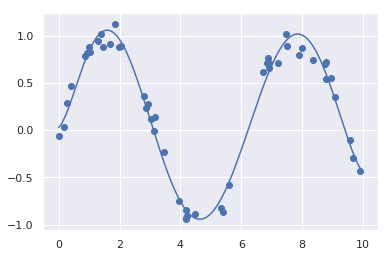

In [0]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

###Gaussian basis functions

Of course, other basis functions are possible. For example, one useful pattern is to fit
a model that is not a sum of polynomial bases, but a sum of Gaussian bases. 

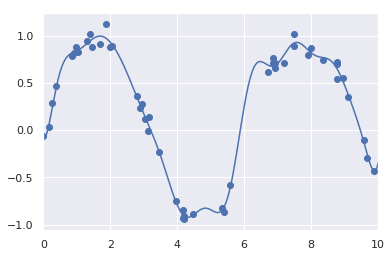

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Uniformly spaced Gaussian features for one-dimensional input"""
  
  def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y=None):
    # create N centers spread along the data range
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self
  
  def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

  
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process
of your data that makes you think one basis or another might be appropriate, you can
use them as well.

#Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to overfitting. For example, if we choose too many Gaussian basis functions, we end up with results that don’t look so good

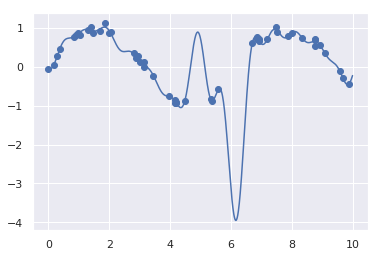

In [0]:
# overfitting
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

With the data projected to the $30$-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data. We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations

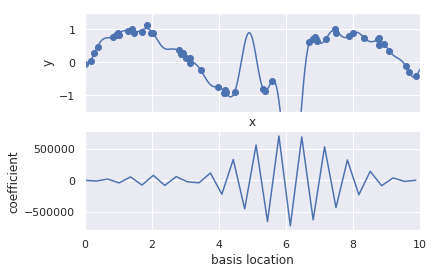

In [0]:
def basis_plot(model, title=None):
  fig, ax = plt.subplots(2, sharex=True)
  model.fit(x[:, np.newaxis], y)
  ax[0].scatter(x, y)
  ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
  if title:
    ax[0].set_title(title)
  ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
  ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))
    
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel shows the amplitude of the basis function at each
location. This is typical overfitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out. We know that such behavior is problematic, and it would be nice if we could limit such spikes explicitly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

Let's remember: **the point of regularization is to avoid overfitting (and hopefully eliminate reductant features).**

##A note about Quadratically Constrained Quadratic Program  (QCQP)

The main idea of regularization is to add constaint on the $\mathbf{w}$ so that its components could not be arbitrarily large. In particularly you can demand


$$
\|\mathbf{w}\|^2=\mathbf{w}^{\top} \mathbf{w}\leq r
$$

Note that $\mathbf{w}^{\top} \mathbf{w}$ is quadratic function.
In mathematical optimization, a quadratically constrained quadratic program (QCQP) is an optimization problem in which both the objective function and the constraints are quadratic functions. It has the form

$$
\begin{aligned}
&\text{Minimize loss function } &E({\mathbf{w}}), \\
&\text{subjected to constraint }\qquad &C({\mathbf{w}}) \leq r,
\end{aligned}
$$

where $E({\mathbf{w}})$ and $C({\mathbf{w}})$ are quadratic functions:

$$
\begin{aligned}
E({\mathbf{w}})={\mathbf{w}}^{\top} E_2 {\mathbf{w}}+E_1 {\mathbf{w}}+E_0, \\
C({\mathbf{w}})={\mathbf{w}}^{\top} C_2 {\mathbf{w}}+C_1 {\mathbf{w}}+C_0.
\end{aligned}
$$

where $C$ is a convex function.

It turns out that the problem above could be reformulated in the following way (dual problem):

$$
\begin{aligned}
\text{Minimize  } \mathcal{L}(\mathbf{w})=E(\mathbf{w})+\alpha \cdot C(\mathbf{w})
\end{aligned}
$$

for some $\alpha$.
$\mathcal{L}(\mathbf{w})$ is called Lagrange function and $\alpha$ - Lagrange multiplier.
This problem is simpler and could be solved with standard methods (e.g. gradient descent method).


##Ridge regression ($L_2$ regularization)

Ridge regression or $L_2$ regularization is also known as Tikhonov or Tikhonov-Phillips regularization. This proceeds by introducing constraint on the sum of squares ($2$-norms) of the model coefficients that esentially forces coefficients to shrink.
In essence we solving QCQP

$$
\begin{aligned}
&\text{Minimize loss function  }\qquad  SS(\mathbf{w}),\\
&\text{subjected to constraint   }\qquad \| \mathbf{w}\|^2 \leq r.
\end{aligned}
$$

Geometrically we are looking for the point where level curves of $SS(\mathbf{w})$ function touches the $L_2$ metric ball of radius $r$ centered at $\mathbf{0}$.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/l2.png)

We can reformulate this in terms of Lagrangian (that is called Ridge fit function in this context)

$$
\mathcal{L}(\mathbf{w})=E_{\text{Ridge}}(\mathbf{w})=SS(\mathbf{w})+\alpha \| \mathbf{w}\|^2,
$$

Note that we have added the following penalty on the standard regression model loss function:

$$
E_2(\mathbf{w}) = \alpha  \| \mathbf{w}\|^2.
$$

where

$$
\| \mathbf{w}\|^2=\sum_{i=0}^n w_i^2.
$$

$\alpha$ is a free parameter that controls the strength of the penalty. This type of
penalized model is built into `Scikit-Learn` with the `Ridge` model.



In [0]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

NameError: ignored

*  $\alpha \to 0$ --- original linear regression
*  $\alpha \to \infty$ --- regression totally suppressed
*  it can be computed very efficiently—at hardly more computational cost than the original linear regression model

##Regression vs Ridge regression in 2D

Suppose you generate random points and use Simple regression and regression with Ridge regularization. If we are seeking for equation

$$
y(x)=a+bx.
$$

Ridge penalty reads as

$$
E_2(b) = \alpha \, b^2.
$$

As this function is less for lesser $b$ it prefers low line slopes. The more is $\alpha$ the more shelved our line will be.

In general Ridge regression penalizes high slopes of the regression hyperplane that why it's sometimes called weights decay method. It's often said that Ridge does shrinkage of coefficients.

In [0]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

rng = np.random.RandomState(1)
x = 10 * rng.rand(20)
y = 2 * x - 5 + 5*rng.randn(20)

def regression_compare(a):
  model = LinearRegression(fit_intercept=True)
  model.fit(x[:, np.newaxis], y)
  model_ridge=make_pipeline(Ridge(alpha=a))
  model_ridge.fit(x[:, np.newaxis], y)
  xfit = np.linspace(0, 10, 1000)
  yfit = model.predict(xfit[:, np.newaxis])
  yfit_ridge = model_ridge.predict(xfit[:, np.newaxis])
  plt.scatter(x, y);
  plt.plot(xfit, yfit);
  plt.plot(xfit, yfit_ridge);
  plt.legend(['Simple regression', 'Ridge regression'])

widgets.interact(regression_compare,
    a = widgets.FloatSlider(min=0.0, max=1000.0, description='alpha =', value=0.0));

interactive(children=(FloatSlider(value=0.0, description='alpha =', max=1000.0), Output()), _dom_classes=('wid…

##Lasso regularization ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves different constraint on ($1$-norm) of regression coefficient $\mathbf{w}$:

$$
\begin{aligned}
&\text{Minimize loss function} &SS(\mathbf{w}), \\
&\text{subjected to constraint} &\sum_i |w_i| \leq r.
\end{aligned}
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/ll1.png)

The constraint function is not quadratic hence it's not QCQP. Nevertheless this function is convex and we solve this problem in the way similar to Ridge introducing 


$$
E_{Lasso}(\mathbf{w})=\mathcal{L}(\mathbf{w})=SS(\mathbf{w})+\alpha \sum_i |w_i|,
$$

Note that we have added following penalty

$$
E_1(\mathbf{w}) = \alpha \sum_i |w_i|.
$$

Though Lasso is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible; that is, it preferentially sets model coefficients to exactly zero. Geometrically this means that level set lines of $SS(\mathbf{w})$ intersect $L_1$ ball at one of its corners. As number of predictors increase, the multidimensional diamond has an increasing number of corners, and so it is highly likely that some coefficients will be set equal to zero.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/ll2.png)

This property could be used as feature selection tool. BTW, LASSO stands for The **l**east **a**bsolute **s**hrinkage and **s**election **o**perator.

The entire path of lasso estimates for all values of $\alpha$ can be efficiently computed through a modification of the *Least Angle Regression* (LARS) algorithm (Efron et al. 2003).


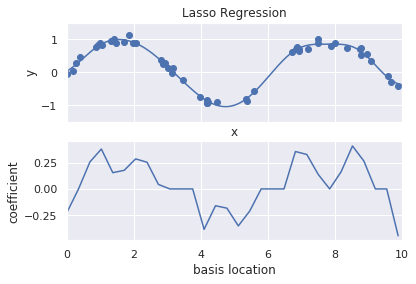

In [0]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, tol=0.01))
basis_plot(model, title='Lasso Regression')

Note that some of $w_i$ are zero - that means that $i$-th feature is redundant.

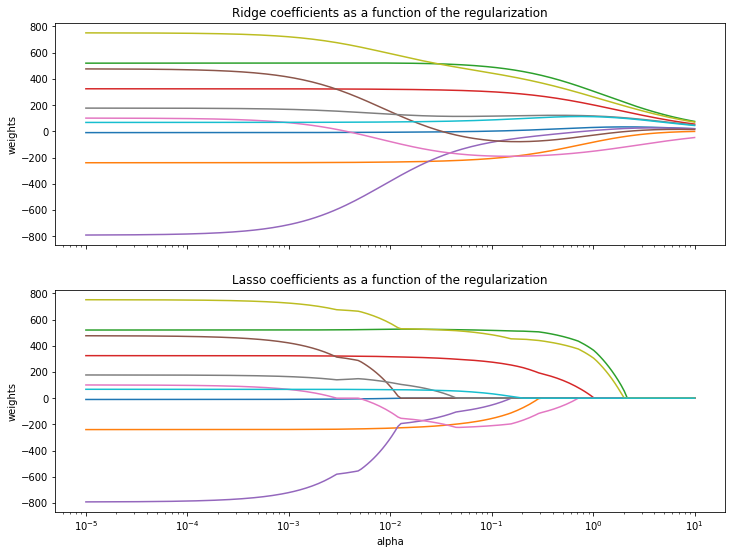

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target


# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-5, 1, n_alphas)

coefs_ridge = []
coefs_lasso = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False, max_iter=10000)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False, max_iter=10000)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)
    

# #############################################################################
# Display results
fig, ax = plt.subplots(2, figsize=(12,9), sharex=True)
ax[0].plot(alphas, coefs_ridge)
ax[0].set_xscale('log')
ax[1].plot(alphas, coefs_lasso)
ax[1].set_xscale('log')

plt.xlabel('alpha')
ax[0].set(ylabel='weights')
ax[0].set_title('Ridge coefficients as a function of the regularization')
ax[1].set(ylabel='weights')
ax[1].set_title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

#Example: Predicting Bicycle Traffic

As an example, let’s take a look at whether we can predict the number of bicycle trips
across Seattle’s Fremont Bridge based on weather, season, and other factors.

![fremont](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_3/map_fremont.png)
![fremont bridge](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/202796_7-16LO3055_182055-780x503.jpg)

In [0]:
# taken from
# https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail
# and
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_bridge.csv
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_weather.csv

In [0]:
import pandas as pd

counts = pd.read_csv('fremont_bridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('fremont_weather.csv', index_col='DATE', parse_dates=True)
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-06-30 23:00:00,7.0,15.0
2019-06-30 22:00:00,20.0,30.0
2019-06-30 21:00:00,31.0,32.0
2019-06-30 20:00:00,72.0,58.0
2019-06-30 19:00:00,58.0,77.0


We see that we have numbers of cyclist that cross the bridge in both directions indexed by the date. We sum these numbers to get the total number of cyclist in both directions.


In [0]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


We attach $7$ more columns to indicate the day of the week ($0$ or $1$).

In [0]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

We add one more column to account the national holidays.

In [0]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

Now we want to add column with hours of daylight which we calculate from the well-known astronomical formula.

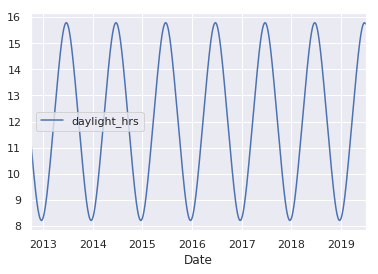

In [0]:
import numpy as np

def hours_of_daylight(date, axis=23.44, latitude=47.61):
  """Compute the hours of daylight for the given date"""
  days = (date - pd.datetime(2000, 12, 21)).days
  m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
  return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = [hours_of_daylight(d) for d in daily.index]
daily[['daylight_hrs']].plot();

Earlier we downloaded weather data, and express temperature and PRCP (precipitation) in more convenient units and add one more column indicating whether the day was dry or not ($0$ or $1$). We want for the change in the count of cyclists that due to the time passed from the start of experiment ('annual' feature).

In [0]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
daily['annual'] = (daily.index - daily.index[0]).days / 365
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs,holiday,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.0,1.335,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.219142,0.0,0.0,1.360,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.161038,0.0,0.0,1.530,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.103056,0.0,0.0,1.585,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.045208,0.0,0.0,1.585,1,0.010959


We now have model with $13$ features
* day of week ($7$ binary features);
* daylight hours (float);
* holiday/not holiday (binary);
* PRCP (float);
* temperature (float);
* dry/not dry day (binary);
* time passed from the first day of observations (float).

Now we do simple linear regression and look at the prediction.

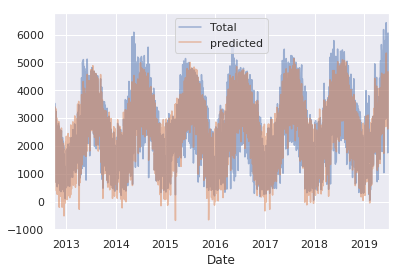

In [0]:
from sklearn.linear_model import LinearRegression

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5);

Here are coefficients of our linear model.

In [0]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              472.562051
Tue              677.815624
Wed              658.769963
Thu              505.487985
Fri              187.045078
Sat            -1168.906823
Sun            -1249.929398
holiday        -1113.753085
daylight_hrs     117.494530
PRCP           -6960.460185
dry day          508.583021
Temp (C)         749.192797
annual            49.203277
dtype: float64

We now use **bootstrapping** technique to get a feeling how uncertain our parameters are.
The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/Dr_Martens,_black,_old.jpg)

We resample our training set (with replacement). Some datapoints will be missing, some will occur twise or tree times, etc. We than fit our model, get the coefficients and calculate their std's.

In [0]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            473.0   65.0
Tue            678.0   64.0
Wed            659.0   62.0
Thu            505.0   64.0
Fri            187.0   62.0
Sat          -1169.0   62.0
Sun          -1250.0   62.0
holiday      -1114.0  149.0
daylight_hrs   117.0    7.0
PRCP         -6960.0  455.0
dry day        509.0   25.0
Temp (C)       749.0   32.0
annual          49.0    6.0


We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays. We see that for each $404$ additional hour of daylight, $129 \pm 9$ more people choose to ride; a temperature increase of one degree Celsius encourages $65 \pm 4$ people to grab their bicycle; a dry day means an average of $546 \pm 33$ more riders; and each inch of precipitation means $665 \pm 62$ more people leave their bike at home. Once all these effects are accounted for, we see a modest increase of $28 \pm 18$ new daily riders each year.


Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday’s numbers, or the effect of an unexpected sunny day after a streak of rainy days). These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!

#Test area

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import ipywidgets as widgets
from sklearn import datasets

@widgets.interact(l1_ratio=(0.001, 1.001))
def plot_elastic(l1_ratio):
  diabetes = datasets.load_diabetes()
  X = diabetes.data
  y = diabetes.target

  n_alphas = 200
  alphas = np.logspace(-5, 1, n_alphas)
  
  coefs_elastic = []
  for a in alphas:
      elastic = linear_model.ElasticNet(alpha=a, l1_ratio=l1_ratio, fit_intercept=False, max_iter=100000)
      elastic.fit(X, y)
      coefs_elastic.append(elastic.coef_)

  fig, ax = plt.subplots(figsize=(12,9), sharex=True)
  ax.plot(alphas, coefs_elastic)
  ax.set_xscale('log')
  plt.xlabel('alpha')
  ax.set(ylabel='weights')
  ax.set_title('Elastic Net coefficients as a function of the regularization')
  plt.axis('tight')
  plt.show()

interactive(children=(FloatSlider(value=0.5009999999999999, description='l1_ratio', max=1.001, min=0.001), Out…